In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

def BSAS(X,theta,q,order):
    N, l = X.shape[:]
    
    n_cluster = 1
    bel = -1*np.ones(N)
    bel[order[0]] = n_cluster
    repre = np.array([X[order[0]]])
    for i in range(1, N):
        dist = (repre-X[order[i]])**2
        dist = np.sqrt(np.sum(dist, axis=1))
        s1 = np.min(dist)
        s2 = np.argmin(dist)
        if(s1 > theta) and (n_cluster < q):
            n_cluster = n_cluster + 1
            bel[order[i]] = n_cluster
            repre = np.concatenate([repre, [X[order[i]]]], axis=0)
        else:
            bel[order[i]] = s2
            repre[s2] = (((np.sum(bel==s2)-1)*repre[s2])+X[order[i]])/np.sum(bel==s2)
    return bel, repre

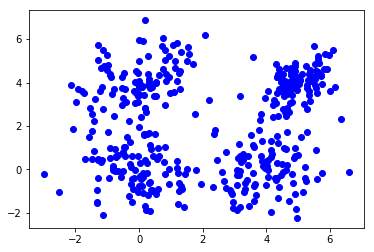

In [2]:
S1 = np.identity(2)
S2 = np.array([[1, 0.2], [0.2, 1.5]])
S3 = np.array([[1, 0.4], [0.4, 1.1]])
S4 = np.array([[0.3, 0.2], [0.2, 0.5]])
m1 = np.array([0, 0])
m2 = np.array([4, 0])
m3 = np.array([0, 4])
m4 = np.array([5, 4])
n = 100

x1 = np.random.multivariate_normal(m1, S1, n)
x2 = np.random.multivariate_normal(m2, S2, n)
x3 = np.random.multivariate_normal(m3, S3, n)
x4 = np.random.multivariate_normal(m4, S4, n)
X = np.concatenate([x1, x2, x3, x4])
plt.plot(X[:, 0], X[:, 1], "bo")
plt.show()

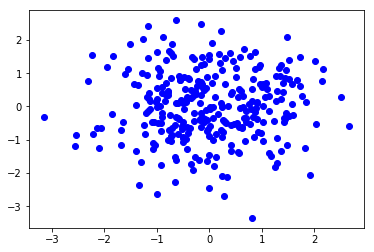

In [3]:
X = np.random.multivariate_normal(m1, S1, 300)
plt.plot(X[:, 0], X[:, 1], "bo")
plt.show()
#n = 400

In [4]:
dista = np.zeros((n, n))
for i in range(n):
    for j in range(i+1, n):
        dista[i, j] = np.sqrt(np.sum((X[i] - X[j])**2))
        dista[j, i] = dista[i, j]
maxdist = np.max(dista)
mindist = np.min(dista)
theta_min = 0.25*(maxdist + mindist)/2
theta_max = 1.75*(maxdist + mindist)/2
s = (theta_min + theta_max)/(50 - 1)
print("theta min %f, theta max %f, s %f" %(theta_min, theta_max, s))

theta min 0.651452, theta max 4.560165, s 0.106360


[33, 27, 22, 19, 16, 15, 14, 12, 11, 9, 9, 7, 7, 6, 6, 5, 5, 5, 5, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


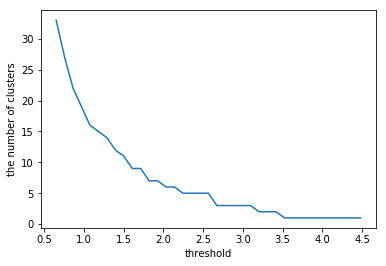

In [6]:
n = 300
q = n
n_times = 10
m_tot = []
for theta in np.arange(theta_min, theta_max, s):
    list_m = np.zeros(q)
    for start in range(n_times):
        order = np.random.permutation(n)
        [bel, m] = BSAS(X, theta, q, order)
        list_m[m.shape[0]] = list_m[m.shape[0]] + 1
    m_size = np.argmax(list_m)
    m_tot.append(m_size)
print(m_tot)

plt.plot(np.arange(theta_min, theta_max, s), m_tot)
plt.xlabel("threshold")
plt.ylabel("the number of clusters")
plt.show()